# Introduction

The National Longitudinal Survey of Youth 1997-2011 dataset is one of the most important databases available to social scientists working with US data. 

It allows scientists to look at the determinants of earnings as well as educational attainment and has incredible relevance for government policy. It can also shed light on politically sensitive issues like how different educational attainment and salaries are for people of different ethnicity, sex, and other factors. When we have a better understanding how these variables affect education and earnings we can also formulate more suitable government policies. 

<center><img src=https://i.imgur.com/cxBpQ3I.png height=400></center>


### Upgrade Plotly

In [1]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


###  Import Statements


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Notebook Presentation

In [3]:
pd.options.display.float_format = "{:,.2f}".format

# Load the Data



In [4]:
df_data = pd.read_csv("NLSY97_subset.csv")

### Understand the Dataset

Have a look at the file entitled `NLSY97_Variable_Names_and_Descriptions.csv`. 

---------------------------

    :Key Variables:  
      1. S           Years of schooling (highest grade completed as of 2011)
      2. EXP         Total out-of-school work experience (years) as of the 2011 interview.
      3. EARNINGS    Current hourly earnings in $ reported at the 2011 interview

# Preliminary Data Exploration 🔎

**Challenge**

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
print(f"The shape of df_data is: {df_data.shape}")
print(f"It has {df_data.shape[0]} rows and {df_data.shape[1]} columns")
print(f"Column names are: {df_data.columns}")

The shape of df_data is: (2000, 96)
It has 2000 rows and 96 columns
Column names are: Index(['ID', 'EARNINGS', 'S', 'EXP', 'FEMALE', 'MALE', 'BYEAR', 'AGE',
       'AGEMBTH', 'HHINC97', 'POVRAT97', 'HHBMBF', 'HHBMOF', 'HHOMBF',
       'HHBMONLY', 'HHBFONLY', 'HHOTHER', 'MSA97NO', 'MSA97NCC', 'MSA97CC',
       'MSA97NK', 'ETHBLACK', 'ETHHISP', 'ETHWHITE', 'EDUCPROF', 'EDUCPHD',
       'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED', 'EDUCDO',
       'PRMONM', 'PRMONF', 'PRMSTYUN', 'PRMSTYPE', 'PRMSTYAN', 'PRMSTYAE',
       'PRFSTYUN', 'PRFSTYPE', 'PRFSTYAN', 'PRFSTYAE', 'SINGLE', 'MARRIED',
       'COHABIT', 'OTHSING', 'FAITHN', 'FAITHP', 'FAITHC', 'FAITHJ', 'FAITHO',
       'FAITHM', 'ASVABAR', 'ASVABWK', 'ASVABPC', 'ASVABMK', 'ASVABNO',
       'ASVABCS', 'ASVABC', 'ASVABC4', 'VERBAL', 'ASVABMV', 'HEIGHT',
       'WEIGHT04', 'WEIGHT11', 'SF', 'SM', 'SFR', 'SMR', 'SIBLINGS', 'REG97NE',
       'REG97NC', 'REG97S', 'REG97W', 'RS97RURL', 'RS97URBN', 'RS97UNKN',
       'JOBS', 'HOURS',

In [6]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 96 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        2000 non-null   int64  
 1   EARNINGS  2000 non-null   float64
 2   S         2000 non-null   int64  
 3   EXP       2000 non-null   float64
 4   FEMALE    2000 non-null   int64  
 5   MALE      2000 non-null   int64  
 6   BYEAR     2000 non-null   int64  
 7   AGE       2000 non-null   int64  
 8   AGEMBTH   1956 non-null   float64
 9   HHINC97   1630 non-null   float64
 10  POVRAT97  1627 non-null   float64
 11  HHBMBF    2000 non-null   int64  
 12  HHBMOF    2000 non-null   int64  
 13  HHOMBF    2000 non-null   int64  
 14  HHBMONLY  2000 non-null   int64  
 15  HHBFONLY  2000 non-null   int64  
 16  HHOTHER   2000 non-null   int64  
 17  MSA97NO   2000 non-null   int64  
 18  MSA97NCC  2000 non-null   int64  
 19  MSA97CC   2000 non-null   int64  
 20  MSA97NK   2000 non-null   int6

In [7]:
print(
    f"NaN: {df_data.isna().values.any()}, NaN values count: {df_data.isna().values.sum()}"
)
print(
    f"Duplicated: {df_data.duplicated().any()}, Duplicated count: {df_data.duplicated().values.sum()}"
)

NaN: True, NaN values count: 8559
Duplicated: True, Duplicated count: 513


## Data Cleaning - Check for Missing Values and Duplicates

Find and remove any duplicate rows.

In [8]:
df_data_clean = df_data.drop_duplicates()
df_data_clean.duplicated().values.sum()

0

In [95]:
df_data_clean = df_data_clean.fillna(0)

## Descriptive Statistics

In [96]:
df_data_clean.describe()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
count,"1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00",...,"1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00"
mean,"3,547.13",18.81,14.56,6.70,0.49,0.51,"1,982.07",28.93,25.72,"47,252.43",...,0.78,0.16,0.27,0.34,0.23,0.05,0.54,0.41,0.00,0.00
std,"2,009.84",12.00,2.77,2.86,0.50,0.50,1.38,1.38,6.38,"45,629.92",...,0.43,0.36,0.44,0.47,0.42,0.21,0.50,0.49,0.04,0.00
min,1.00,2.00,6.00,0.00,0.00,0.00,"1,980.00",27.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,888.00",11.41,12.00,4.65,0.00,0.00,"1,981.00",28.00,22.00,"13,740.50",...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"3,474.00",15.75,15.00,6.63,0.00,1.00,"1,982.00",29.00,26.00,"41,840.00",...,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
75%,"5,160.50",22.60,16.00,8.71,1.00,1.00,"1,983.00",30.00,30.00,"66,400.00",...,1.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00
max,"8,980.00",132.89,20.00,14.73,1.00,1.00,"1,984.00",31.00,45.00,"246,474.00",...,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00


## Visualise the Features

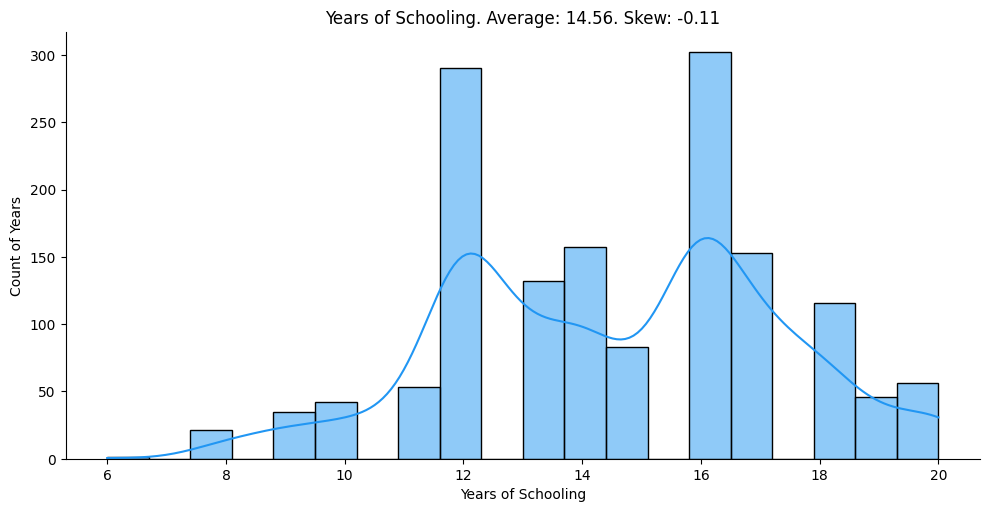

In [101]:
sns.displot(df_data_clean.S, aspect=2, kde=True, color="#2196f3")

plt.title(
    f"Years of Schooling. Average: {df_data_clean.S.mean():.2f}. Skew: {df_data_clean.S.skew():.2f}"
)
plt.xlabel("Years of Schooling")
plt.ylabel("Count of Years")

plt.show()

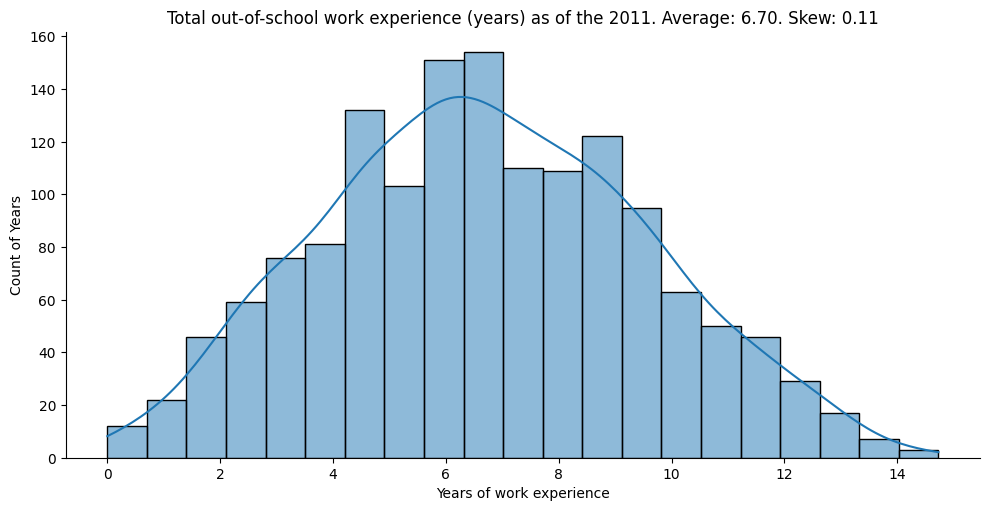

In [98]:
sns.displot(df_data_clean.EXP, aspect=2, kde=True)

plt.title(
    f"Total out-of-school work experience (years) as of the 2011. Average: {df_data_clean.EXP.mean():.2f}. Skew: {df_data_clean.EXP.skew():.2f}"
)
plt.xlabel("Years of work experience")
plt.ylabel("Count of Years")

plt.show()

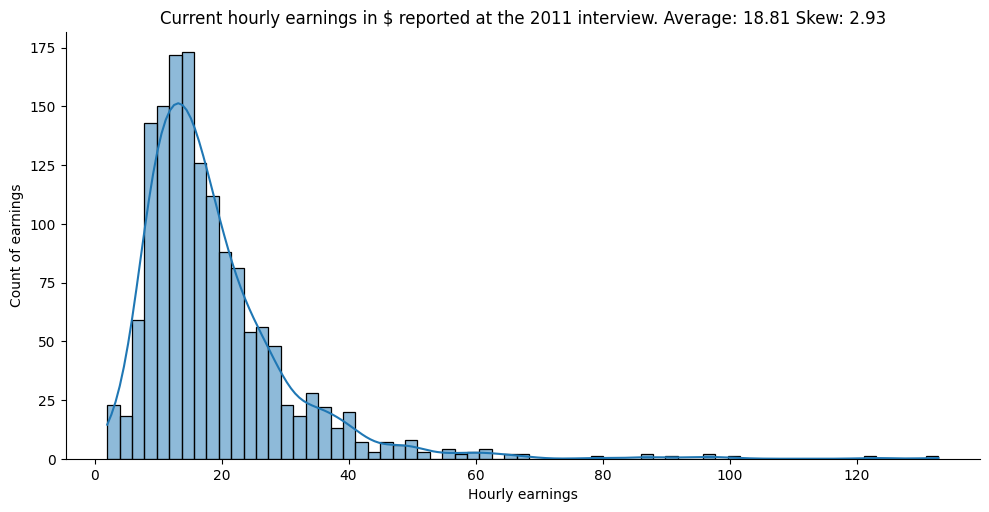

In [100]:
sns.displot(df_data_clean.EARNINGS, aspect=2, kde=True)

plt.title(
    f"Current hourly earnings in $ reported at the 2011 interview. Average: {df_data_clean.EARNINGS.mean():.2f} Skew: {df_data_clean.EARNINGS.skew():.2f}"
)
plt.xlabel("Hourly earnings")
plt.ylabel("Count of earnings")

plt.show()

In [13]:
df_data_clean.head(3)

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
0,4275,18.50,12,9.71,0,1,1984,27,24.00,"64,000.00",...,1,0,0,1,0,0,0,1,0,0
1,4328,19.23,17,5.71,0,1,1982,29,32.00,"6,000.00",...,2,0,0,1,0,0,1,0,0,0
2,8763,39.05,14,9.94,0,1,1981,30,23.00,"88,252.00",...,1,0,0,0,1,0,0,1,0,0


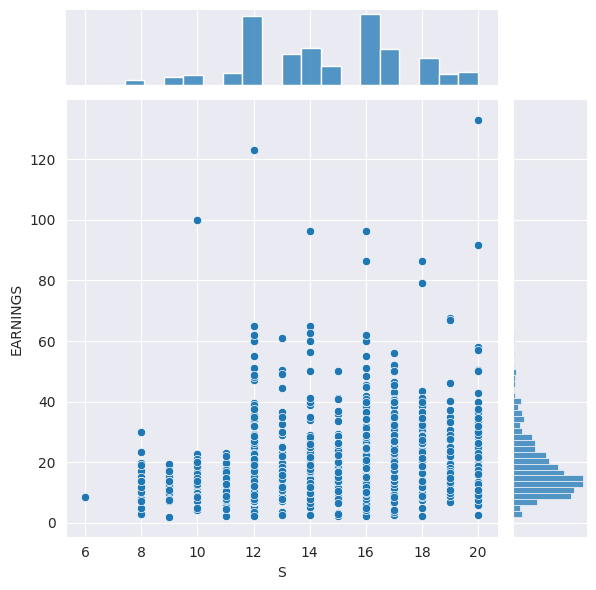

In [16]:
with sns.axes_style("darkgrid"):
    sns.jointplot(x=df_data_clean.S, y=df_data_clean.EARNINGS)

plt.show()

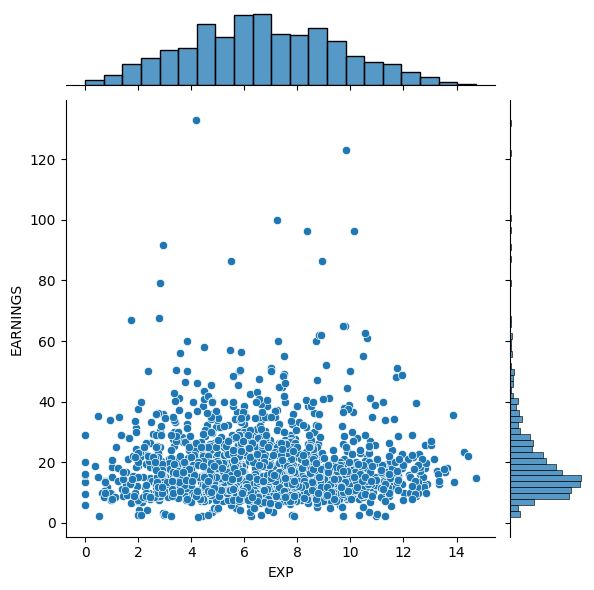

In [18]:
# with sns.axes_style("darkgrid"):
sns.jointplot(x=df_data_clean.EXP, y=df_data_clean.EARNINGS)

plt.show()

# Split Training & Test Dataset

We *can't* use all the entries in our dataset to train our model. Keep 20% of the data for later as a testing dataset (out-of-sample data).  

In [20]:
target = df_data_clean.EARNINGS
features = df_data_clean.loc[:, ["S", "EXP"]]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=10
)

# Simple Linear Regression

Only use the years of schooling to predict earnings. Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data? 

y = ax + b

In [52]:
# reshape x array to 2D array
X_train_s = np.array(X_train.S).reshape(-1, 1)

In [61]:
print(f"Dimension of X(single variable feature): {X_train_s.ndim}")
print(f"Shape of X(single variable feature): {X_train_s.shape}")

Dimension of X(single variable feature): 2
Shape of X(single variable feature): (1189, 1)


In [63]:
# r-squared is very low on the training data
regr = LinearRegression()
regr.fit(X_train_s, y_train)
rsquared = regr.score(X_train_s, y_train)
print(f"Training data r-squred: {rsquared:.2}")

Training data r-squred: 0.081


### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 

Interpret the regression. How many extra dollars can one expect to earn for an additional year of schooling?

In [67]:
slope = regr.coef_[0]
intercept = regr.intercept_
print("Slope:", slope)
print("Intercept:", intercept)

Slope: 1.219177982001233
Intercept: 1.0289074107474079


In [71]:
# x = x + 1, extra dollars = a + b
print(
    f"{(slope+intercept):.2f} dollars can one expect to earn for an additional year of schooling."
)

2.25 dollars can one expect to earn for an additional year of schooling.


### Analyse the Estimated Values & Regression Residuals

How good our regression is also depends on the residuals - the difference between the model's predictions ( 𝑦̂ 𝑖 ) and the true values ( 𝑦𝑖 ) inside y_train. Do you see any patterns in the distribution of the residuals?

In [73]:
predicted_values = regr.predict(X_train_s)
residuals = y_train - predicted_values

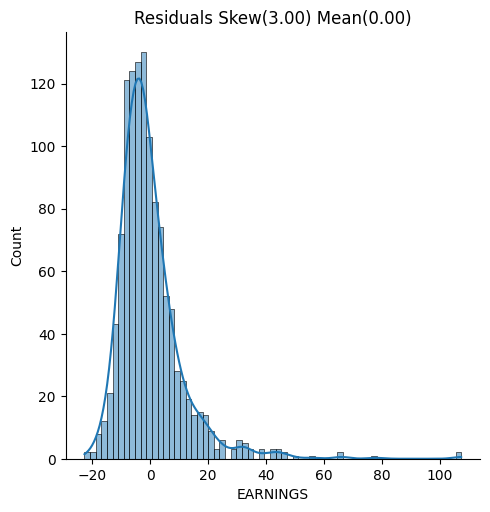

In [106]:
# residual distribtion chart
sns.displot(
    residuals,
    kde=True,
)
plt.title(f"Residuals Skew({residuals.skew():.2f}) Mean({residuals.mean():.2f})")
plt.show()

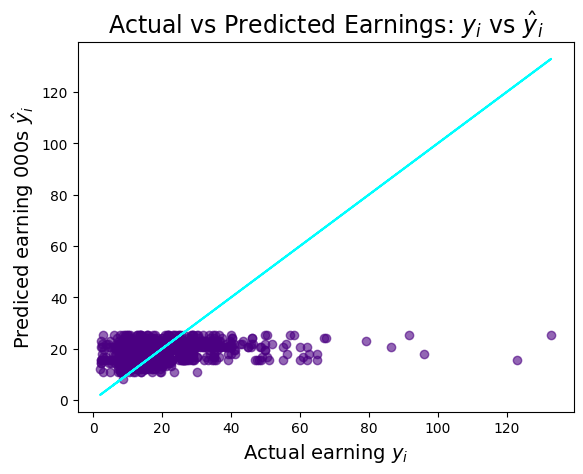

In [75]:
# Actual vs. Predicted
plt.figure(dpi=100)
plt.scatter(x=y_train, y=predicted_values, c="indigo", alpha=0.6)
plt.plot(y_train, y_train, color="cyan")
plt.title(f"Actual vs Predicted Earnings: $y _i$ vs $\hat y_i$", fontsize=17)
plt.xlabel("Actual earning $y _i$", fontsize=14)
plt.ylabel("Prediced earning 000s $\hat y _i$", fontsize=14)
plt.show()

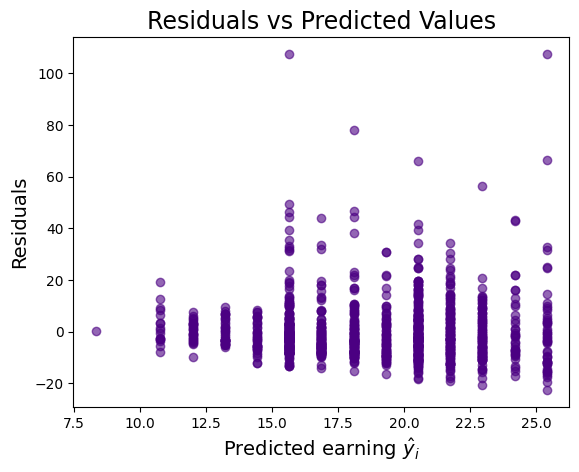

In [76]:
# Residuals vs Predicted values
plt.figure(dpi=100)
plt.scatter(x=predicted_values, y=residuals, c="indigo", alpha=0.6)
plt.title("Residuals vs Predicted Values", fontsize=17)
plt.xlabel("Predicted earning $\hat y _i$", fontsize=14)
plt.ylabel("Residuals", fontsize=14)
plt.show()

# Multivariable Regression

Now use both years of schooling and the years work experience to predict earnings. How high is the r-squared for the regression on the training data? 

In [77]:
regr2 = LinearRegression()
regr2.fit(X_train, y_train)
rsquared2 = regr2.score(X_train, y_train)
print(f"Training data r-squared: {rsquared2:.2}")

Training data r-squared: 0.12


### Evaluate the Coefficients of the Model

In [78]:
coef = regr2.coef_
coef

array([1.79422175, 0.97900689])

### Analyse the Estimated Values & Regression Residuals

In [81]:
predicted_values2 = regr2.predict(X_train)
residuals2 = y_train - predicted_values2

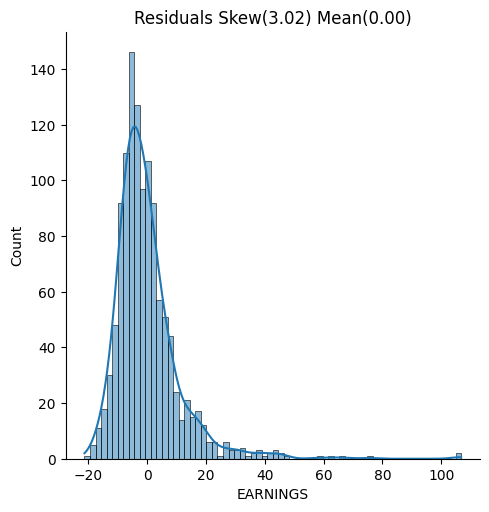

In [107]:
# residual distribtion chart
sns.displot(
    residuals2,
    kde=True,
)
plt.title(f"Residuals Skew({residuals2.skew():.2f}) Mean({residuals2.mean():.2f})")
plt.show()

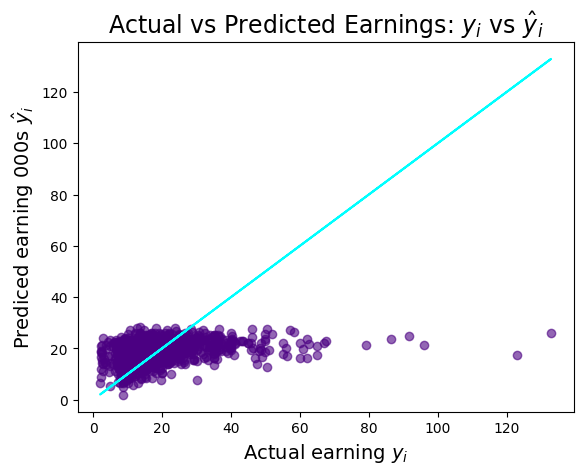

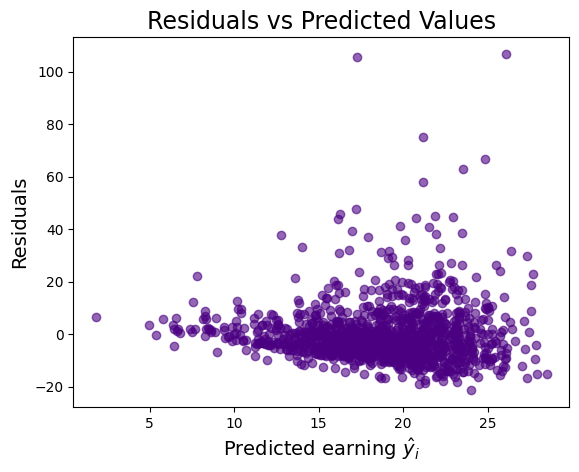

In [84]:
# Actual vs Predicted
plt.figure(dpi=100)
plt.scatter(x=y_train, y=predicted_values2, c="indigo", alpha=0.6)
plt.plot(y_train, y_train, color="cyan")
plt.title(f"Actual vs Predicted Earnings: $y _i$ vs $\hat y_i$", fontsize=17)
plt.xlabel("Actual earning $y _i$", fontsize=14)
plt.ylabel("Prediced earning 000s $\hat y _i$", fontsize=14)
plt.show()


# Residuals vs Predicted values
plt.figure(dpi=100)
plt.scatter(x=predicted_values2, y=residuals2, c="indigo", alpha=0.6)
plt.title("Residuals vs Predicted Values", fontsize=17)
plt.xlabel("Predicted earning $\hat y _i$", fontsize=14)
plt.ylabel("Residuals", fontsize=14)
plt.show()

# Use Your Model to Make a Prediction

How much can someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn in 2011?

In [88]:
someone = pd.DataFrame({"S": [16], "EXP": [5]})
someone

,S,EXP
0,16,5


In [92]:
earning_est = regr2.predict(someone)[0]
print(
    f"Someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn {earning_est:.2f} in 2011"
)

Someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn 19.71 in 2011


# Experiment and Investigate Further

Which other features could you consider adding to further improve the regression to better predict earnings? 

In [108]:
# add highest education
df_data_clean.head()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
0,4275,18.50,12,9.71,0,1,1984,27,24.00,"64,000.00",...,1,0,0,1,0,0,0,1,0,0
1,4328,19.23,17,5.71,0,1,1982,29,32.00,"6,000.00",...,2,0,0,1,0,0,1,0,0,0
2,8763,39.05,14,9.94,0,1,1981,30,23.00,"88,252.00",...,1,0,0,0,1,0,0,1,0,0
3,8879,16.80,18,1.54,0,1,1983,28,30.00,0.00,...,1,0,1,0,0,0,1,0,0,0
4,1994,36.06,15,2.94,0,1,1984,27,23.00,"44,188.00",...,1,0,0,0,1,0,0,1,0,0


In [127]:
other_columns = ["HOURS", "TENURE", "COLLBARG", "JOBS"]

In [128]:
df_data_clean.loc[:, other_columns].head()

,HOURS,TENURE,COLLBARG,JOBS
0,50,4.77,0,6.00
1,50,9.06,0,0.00
2,65,4.98,0,3.00
3,40,1.02,1,10.00
4,40,2.35,0,7.00


In [129]:
other_columns.extend(["S", "EXP"])

In [130]:
other_columns

['HOURS', 'TENURE', 'COLLBARG', 'JOBS', 'S', 'EXP']

In [136]:
new_target = df_data_clean.EARNINGS
new_features = df_data_clean.loc[:, other_columns]

X_train, X_test, y_train, y_test = train_test_split(
    new_features, new_target, test_size=0.2, random_state=10
)

In [137]:
regr_new = LinearRegression()
regr_new.fit(X_train, y_train)
rsquared_new = regr_new.score(X_train, y_train)
print(f"Training data r-squared: {rsquared2:.2}")

Training data r-squared: 0.12


In [140]:
regr_coef = pd.DataFrame(
    data=regr_new.coef_, index=X_train.columns, columns=["Coefficient"]
)
regr_coef

,Coefficient
HOURS,0.09
TENURE,0.11
COLLBARG,3.31
JOBS,-0.34
S,1.73
EXP,0.91


In [141]:
predicted_vals_new = regr_new.predict(X_train)
residuals_new = y_train - predicted_vals_new

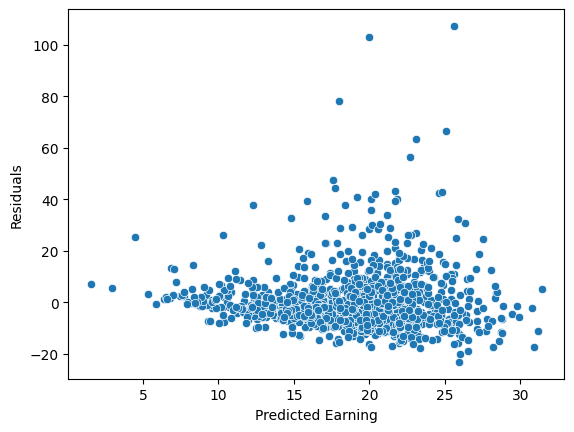

In [144]:
sns.scatterplot(x=predicted_vals_new, y=residuals_new)
plt.xlabel("Predicted Earning")
plt.ylabel("Residuals")
plt.show()

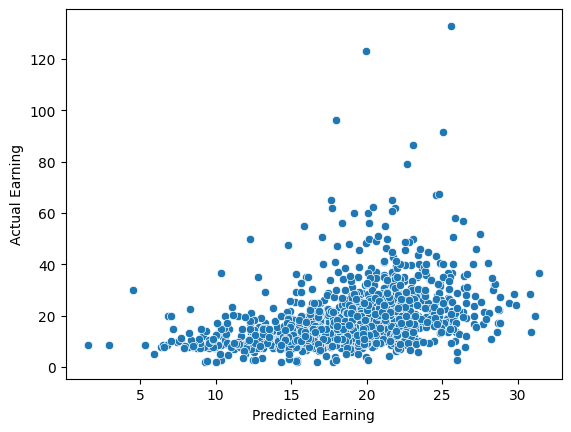

In [145]:
sns.scatterplot(x=predicted_vals_new, y=y_train)
plt.xlabel("Predicted Earning")
plt.ylabel("Actual Earning")
plt.show()